<div align="left">
<img align="left" src="viisar.png"  height="120" width="120">

<div> <b> In1024 </b></div>
<div> Processamento de Imagens </div>
<div> Pedro D. Marrero Fernandez</div>
<div> https://sites.google.com/a/cin.ufpe.br/in1024/home</div>
<div> pdmf@cin.ufpe.br </div>
<div> :), :(, :/</div>
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from scipy.misc import imresize as imresize

from skimage import data
from skimage import color
from skimage import img_as_float


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

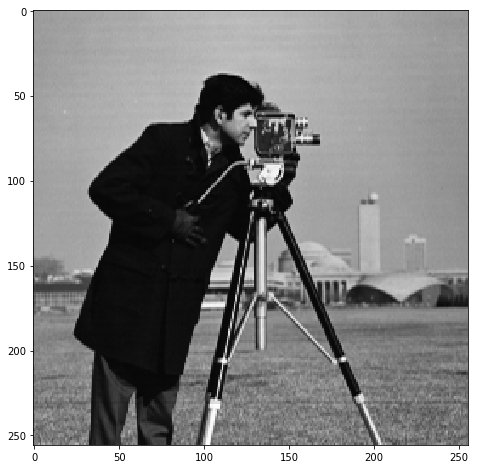

In [4]:
image = img_as_float(data.camera()[::2, ::2])

plt.figure( figsize=(8,8) )
plt.imshow(image, cmap='gray')
plt.show()

# Frequency Response 

In [213]:

# Flat filters
h = np.array(
    [[1/9, 1/9, 1/9],
     [1/9, 1/9, 1/9],
     [1/9, 1/9, 1/9],
    ]
    )


n=100
step = np.pi/n
wrange = np.arange(-np.pi,np.pi+step,step)
yrange = np.arange(-1.0,1.0+1/n, 1/n )

#H = np.zeros( (len(wrange),len(wrange)) )
#for i,w1 in enumerate(wrange):
#    for j,w2 in enumerate(wrange):        
#        ii,jj = yrange[i],yrange[j]
#        H[i,j] = 1.0/9 + \
#                 2.0/9*np.cos( w1*ii ) + 2.0/9*np.cos( w2*jj ) + \
#                 2.0/9*np.cos( w1*ii + w2*jj ) + 2.0/9*np.cos( w1*ii - w2*jj )

w1,w2 =  wrange,wrange
ii,jj =  yrange,yrange

w1, w2 = np.meshgrid(w1, w2)
ii, jj = np.meshgrid(ii, jj)

H = 1.0/9 + \
    2.0/9*np.cos( w1*ii ) + 2.0/9*np.cos( w2*jj ) + \
    2.0/9*np.cos( w1*ii + w2*jj ) + 2.0/9*np.cos( w1*ii - w2*jj )




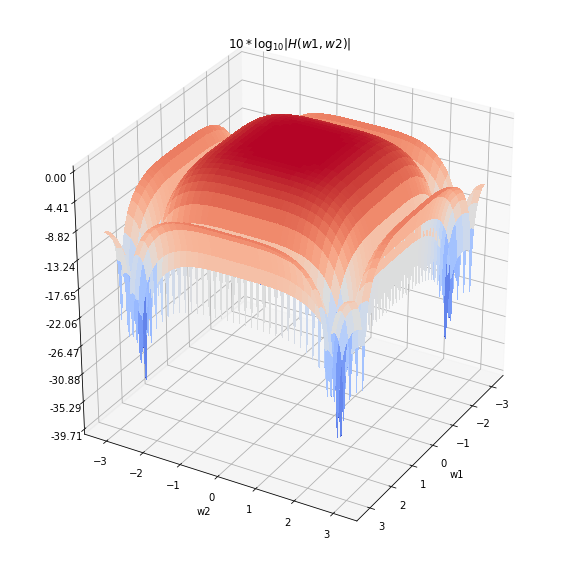

In [214]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure( figsize=(10,10))
ax = fig.gca(projection='3d')

X,Y = wrange,wrange
X, Y = np.meshgrid(X, Y)
Z = 10*np.log10( np.abs(H) )

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel("w1")
ax.set_ylabel("w2")
ax.set_zlabel("")
ax.set_title('$10*\log_{10} |H(w1,w2)| $')

ax.view_init(30, 30)

plt.show()



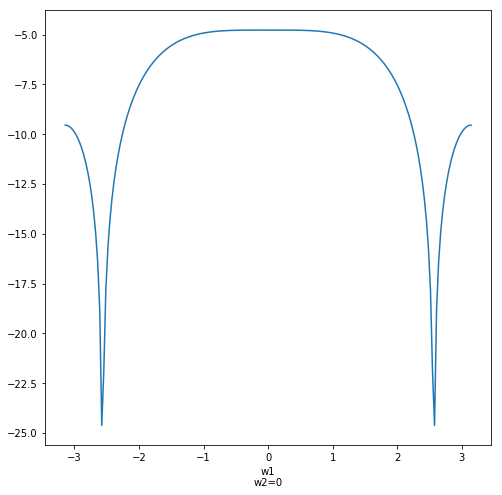

In [203]:
plt.figure( figsize=(8,8) )
#plt.imshow(  10*np.log10( np.abs(  H  ) ) )
plt.plot(wrange, 10*np.log10( np.abs(  H[:,0]  ) ) )
plt.xlabel('w1\nw2=0')
plt.show()

(256, 256)


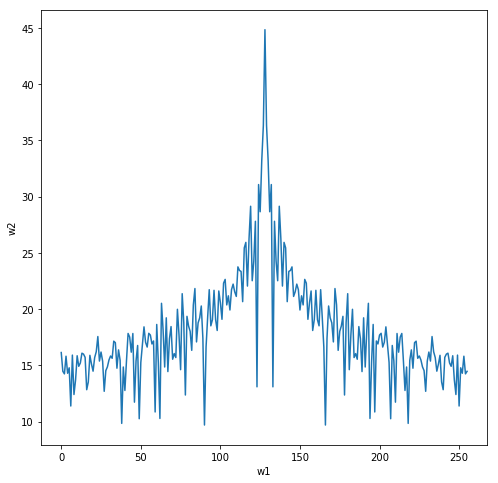

In [287]:
h,w = image.shape

noise_sigma = 0.03
noise = np.random.randn(h,w) * noise_sigma

X = np.fft.fft2( image + noise )
#N = np.ones_like( X )*50.0
Xnoise =  X

print(X.shape)

plt.figure( figsize=(8,8) )
#plt.imshow(  10*np.log10( np.abs( np.fft.fftshift( H ) ) ) )
plt.plot( np.arange(w) , 10*np.log10( np.abs( np.fft.fftshift( Xnoise[:,0] )  ) ) )
plt.xlabel('w1')
plt.ylabel('w2')
plt.show()


(256, 256) -0.0655871922905 1.05794995022


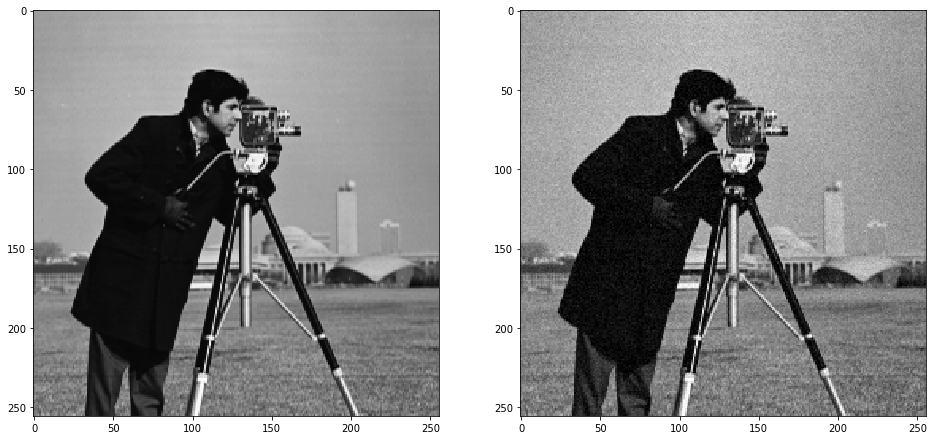

In [288]:

xnoise = np.fft.ifft2(Xnoise).real

print(xnoise.shape, xnoise.min(),xnoise.max())

xnoise[xnoise<0] = 0
xnoise[xnoise>1] = 1

plt.figure( figsize=(16,16) )
plt.subplot(121)
plt.imshow( image , cmap='gray')
plt.subplot(122)
plt.imshow( xnoise , cmap='gray')
plt.show()


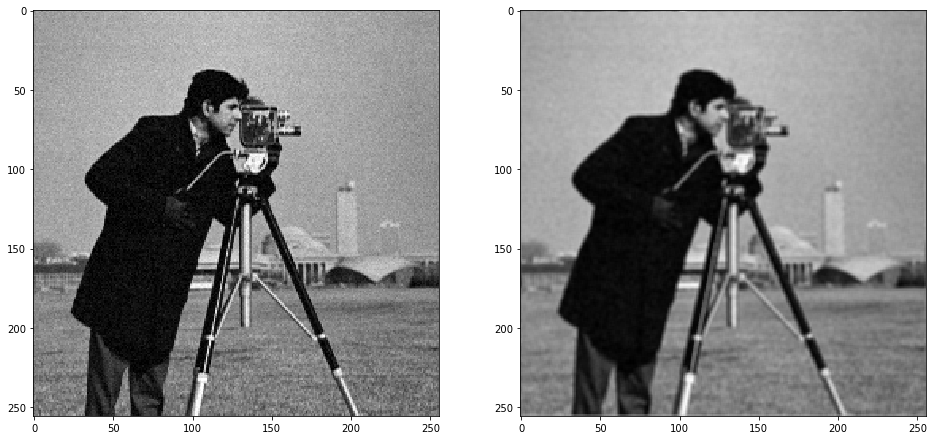

In [290]:

h = np.array(
    [[1/9, 1/9, 1/9],
     [1/9, 1/9, 1/9],
     [1/9, 1/9, 1/9],
    ]
    )

x = xnoise
xh,xw = x.shape
kw,kh = 3,3

# padding kernel
hpad = np.zeros((xh,xw))
hpad[ :kh, :kw ] = h;

cy = -np.round(float(kh-1)/2.0).astype(int);
cx = -np.round(float(kw-1)/2.0).astype(int);
hpad = np.roll( hpad, shift=(cy,cx), axis=(0,1)) 

H = np.fft.fft2(hpad)
X = np.fft.fft2(x)

Xdenoise = X*H

xdenoise = np.fft.ifft2(Xdenoise).real

xdenoise[xdenoise<0] = 0
xdenoise[xdenoise>1] = 1

plt.figure( figsize=(16,16) )
plt.subplot(121)
plt.imshow( xnoise , cmap='gray')
plt.subplot(122)
plt.imshow( xdenoise , cmap='gray')
plt.show()

